In [2]:
#ML_house price prediction-project:)

import pandas as pd
import numpy as np
df =pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.drop(columns=['furnishingstatus'],inplace=True)

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no


In [7]:
#removed the column named furnishingstatus

In [8]:
df.shape

(545, 12)

In [9]:
#we have a small ammount of data.but it's ok.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            545 non-null    int64 
 1   area             545 non-null    int64 
 2   bedrooms         545 non-null    int64 
 3   bathrooms        545 non-null    int64 
 4   stories          545 non-null    int64 
 5   mainroad         545 non-null    object
 6   guestroom        545 non-null    object
 7   basement         545 non-null    object
 8   hotwaterheating  545 non-null    object
 9   airconditioning  545 non-null    object
 10  parking          545 non-null    int64 
 11  prefarea         545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [11]:
df.duplicated().sum()

0

In [12]:
#every thing is fine in this data set.lets start...

In [14]:
import seaborn as sns

C:\Users\debad\AppData\Local\Temp\ipykernel_6424\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<AxesSubplot: xlabel='price', ylabel='Density'>

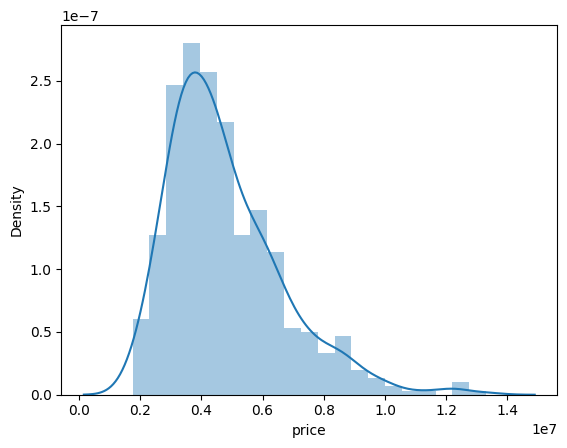

In [15]:
sns.distplot(df['price'])

In [16]:
#this is the distribution of the data

<AxesSubplot: >

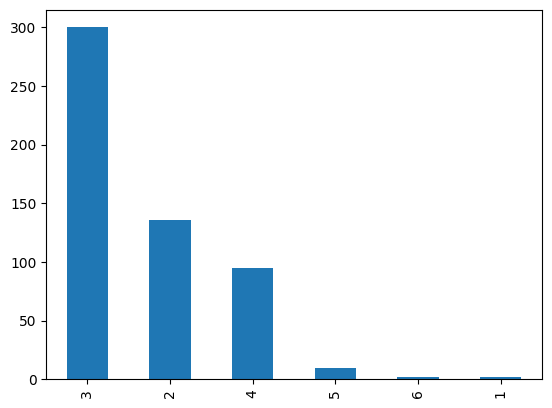

In [17]:
df['bedrooms'].value_counts().plot(kind='bar')

<AxesSubplot: >

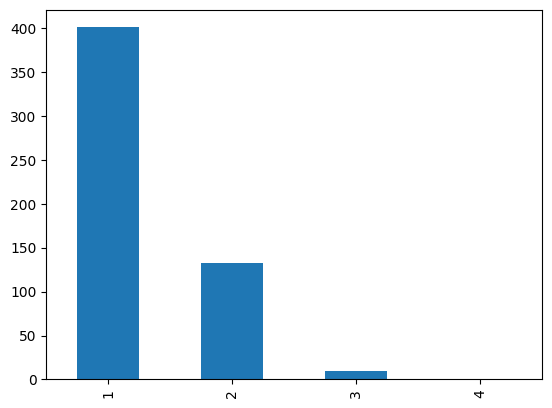

In [20]:
df['bathrooms'].value_counts().plot(kind='bar')

In [22]:
df.corr()['price']

C:\Users\debad\AppData\Local\Temp\ipykernel_6424\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


price        1.000000
area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64

In [23]:
#every thing is fine.let's check the heatmap

C:\Users\debad\AppData\Local\Temp\ipykernel_6424\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

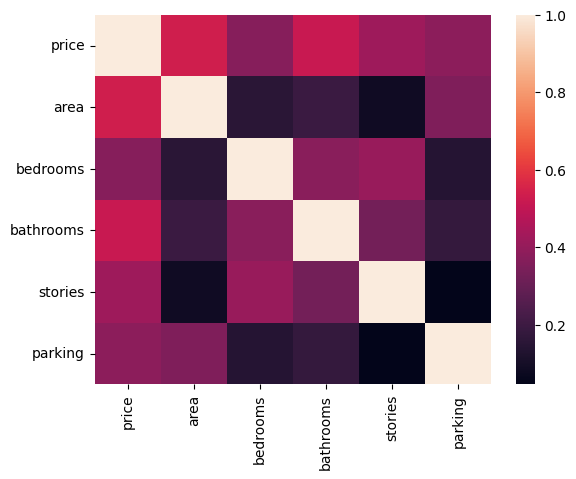

In [25]:
sns.heatmap(df.corr())

C:\Users\debad\AppData\Local\Temp\ipykernel_6424\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<AxesSubplot: xlabel='price', ylabel='Density'>

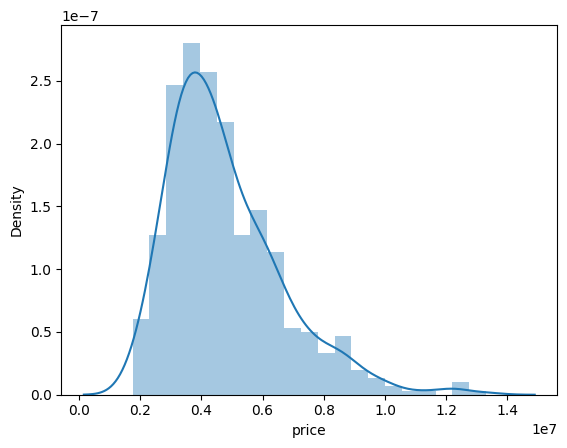

In [26]:
sns.distplot(df['price'])

In [27]:
#apply  log on our target column.

In [28]:
x= df.drop(columns=['price'])
y= np.log(df['price'])

In [29]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,yes,no,no,no,yes,2,yes
1,8960,4,4,4,yes,no,no,no,yes,3,no
2,9960,3,2,2,yes,no,yes,no,no,2,yes
3,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,7420,4,1,2,yes,yes,yes,no,yes,2,no
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no
541,2400,3,1,1,no,no,no,no,no,0,no
542,3620,2,1,1,yes,no,no,no,no,0,no
543,2910,3,1,1,no,no,no,no,no,0,no


In [30]:
y

0      16.403275
1      16.321036
2      16.321036
3      16.318175
4      16.250001
         ...    
540    14.414347
541    14.384879
542    14.375126
543    14.375126
544    14.375126
Name: price, Length: 545, dtype: float64

C:\Users\debad\AppData\Local\Temp\ipykernel_6424\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<AxesSubplot: xlabel='price', ylabel='Density'>

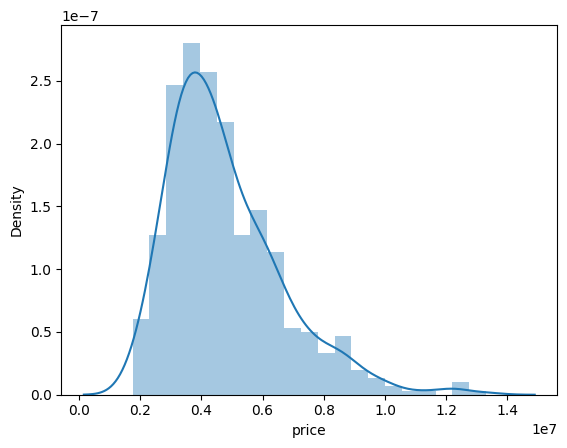

In [31]:
sns.distplot(df['price'])

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [33]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
300,4079,3,1,3,yes,no,no,no,no,0,no
517,3000,2,1,1,yes,no,no,no,no,1,no
438,4500,2,1,1,no,no,no,no,no,0,no
370,4280,2,1,1,yes,no,no,no,yes,2,no
24,8800,3,2,2,yes,no,no,no,yes,2,no
...,...,...,...,...,...,...,...,...,...,...,...
299,7000,3,1,1,yes,no,no,no,no,3,no
534,3000,4,1,2,yes,no,no,no,no,0,no
493,3960,3,1,1,yes,no,no,no,no,0,no
527,1836,2,1,1,no,no,yes,no,no,0,no


## ALL importent algorithm

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score,mean_absolute_error



from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [35]:
df.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes


# APPLY onehotencoding

## LinearRegression

# step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[4,5,6,7,8,10])
    
],remainder= 'passthrough')

step2 = LinearRegression()

pipe =  Pipeline([
    ('step1',step1),
    ('step2',step2),
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [38]:
np.exp(0.16)

1.1735108709918103

## Ridge Regression. 

In [39]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[4,5,6,7,8,10])
    
],remainder= 'passthrough')

step2 = Ridge(alpha=10)

pipe =  Pipeline([
    ('step1',step1),
    ('step2',step2),
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6434655502687888
MAE 0.1661146984791564


C:\Users\debad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Lasso Regression.

In [41]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[4,5,6,7,8,10])
    
],remainder= 'passthrough')

step2 = Ridge(alpha=0.002)

pipe =  Pipeline([
    ('step1',step1),
    ('step2',step2),
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6514720917368472
MAE 0.16818067062800468


C:\Users\debad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Decision Tree

In [42]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[4,5,6,7,8,10])
    
],remainder= 'passthrough')

step2 =DecisionTreeRegressor(max_depth=8)

pipe =  Pipeline([
    ('step1',step1),
    ('step2',step2),
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.30600506823506934
MAE 0.23046966780239014


C:\Users\debad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Random Forest

In [43]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[4,5,6,7,8,10])
    
],remainder= 'passthrough')

step2 =RandomForestRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15)

pipe =  Pipeline([
    ('step1',step1),
    ('step2',step2),
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5959293152678683
MAE 0.1836783688698211


C:\Users\debad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## AdaBoost

In [44]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[4,5,6,7,8,10])
    
],remainder= 'passthrough')

step2 =AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe =  Pipeline([
    ('step1',step1),
    ('step2',step2),
    
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.3876795191412098
MAE 0.22456394260302576


C:\Users\debad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## We tried many algorithms. Many more algorithms can be used if we want to get a more perfect result.

## I applied linear regression here

## Or voting regressors could also be used here..

## Exporting the model

In [45]:
import pickle

In [48]:
pickle.dump(df,open('df.pk','wb'))
pickle.dump(pipe,open('pipe.pk','wb'))

In [49]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no
541,1767150,2400,3,1,1,no,no,no,no,no,0,no
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no
543,1750000,2910,3,1,1,no,no,no,no,no,0,no
